# Representative-Based Clustering - Inside the K-Means Algorithm

Frequently asked questions in data analysis are: How can I partition a set of data so that the individual groups share a maximum of similarity? And how many groups are there?

The k-means algorithm is used to determine a number of k clusters from an arbitrary amount of (unlabeled) data points, without hierarchical relationships, residing in a defined number of dimensions. It is run in iterations, which upon convergence yield representatives for k cluster centres. A commonly used optimization target is the minimization of the sum of squared Euclidian distances of the data points to a representative. However, the algorithm is sensitive to local optima. 

To understand the workings of the algorithm it is 
    1. implemented in single iterations and 
    2. used to determine the most dominant colours in an image

# Import Section

In [1]:
# The necessary imports and configurations for this project
import matplotlib.pyplot as plt
import numpy as np
from random import random
import matplotlib.image as img
from sklearn.cluster import KMeans

%matplotlib nbagg

# 1. K-Means Iterative Implementation

**Theory**

We consider a data set $D$ with $n$ data points $\hat{X}_1$ to $\hat{X}_n$ in a d-dimensional space. Our aim is to determine $k$ representatives $\hat{Y}_1$ to $\hat{Y}_k$, that minimize our objective function 
$ O= \sum_{i=1}^n min_j [ dist(\hat{X}_i,\hat{Y}_j) ] $

In most standard implementations the distance function of choice is the squared Euclidian distance,
$ dist(\hat{X}_i,\hat{Y}_j) =|| \hat{X}_i - \hat{Y}_j ||^2 $, however, depending on the problem other distance measures my prove to be more fruitful.

**Algorithm**

The algorithm executes in an iterative fashion:

1. Assign each data point to the currently closest representative
2. Update the position of the representatives by their data point members
3. Check if a termination condition is fullfilled, e.g. convergence was achieved


### Generate Random Data

<IPython.core.display.Javascript object>


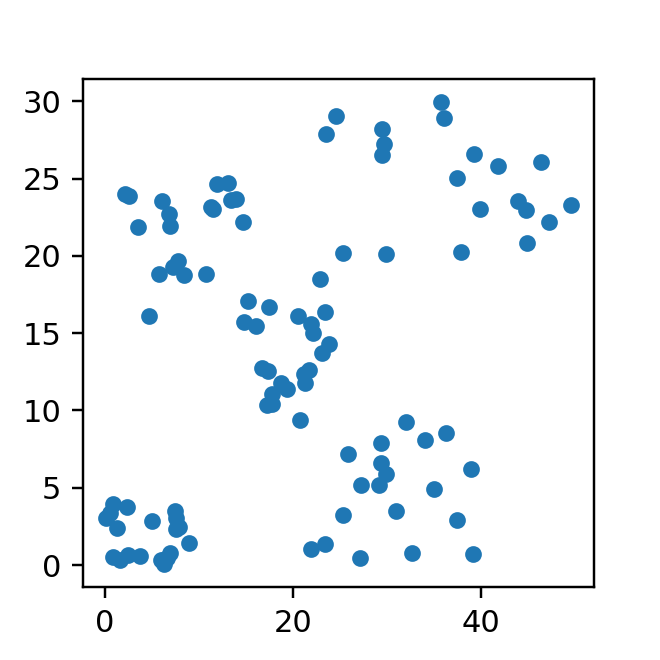

In [93]:
# generate a cloud of test data in two dimensions with approximately five clusters of randomized shapes:
data = np.zeros((100,2))
for i in range(20):
    data[i,0]=10*random()
    data[i,1]=5*random()
for i in range(20):
    data[i+20,0]=30*random()+20
    data[i+20,1]=10*random()+20
for i in range(20):
    data[i+40,0]=15*random()
    data[i+40,1]=10*random()+15
for i in range(20):
    data[i+60,0]=20*random()+20
    data[i+60,1]=10*random()
for i in range(20):
    data[i+80,0]=9*random()+15
    data[i+80,1]=9*random()+10
    
plt.figure(figsize=(3,3))
plt.scatter(data[:,0], data[:,1], s=20)
plt.show()

### Distance Function Specification and Initialization of Representatives

In [94]:
# Definition of the squared Euclidian distance
def dist(label,rep):
    return (label[0]-rep[0])**2+(label[1]-rep[1])**2

In [95]:
# Initialization of the representatives

# Number of expected clusters
cluster_num = 5
# Data tuples
tuples = data[:]
# Initial positions of representatives
rep_pos = np.zeros((cluster_num,2))

# Generate the seed positions for the representatives through random points in the relevant data region 
# (one could also pick random data points as initialization)
x_max = max(tuples[:,0])
x_min = min(tuples[:,0])
y_max = max(tuples[:,1])
y_min = min(tuples[:,1])
for index in range(5):
    rep_pos[index,0]=random()*(x_max-x_min)+x_min
    rep_pos[index,1]=random()*(y_max-y_min)+y_min
    
# Lists to store the representative's positions and clusters over iterations
rep_list = [rep_pos]
cluster_list = [tuples]

<IPython.core.display.Javascript object>


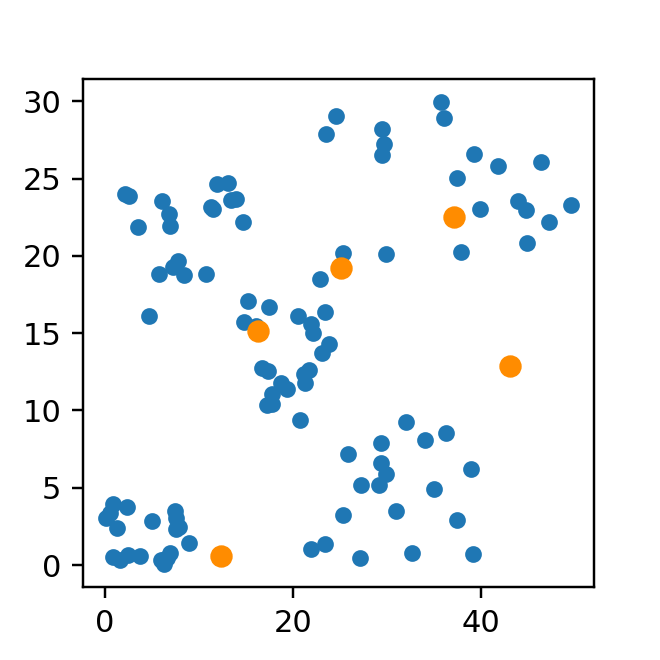

In [96]:
# A plot of the data points (blue) and the initial representative locations (orange)
plt.figure(figsize=(3,3))
plt.scatter(tuples[:,0], tuples[:,1], s=20)
plt.scatter(rep_pos[:,0],rep_pos[:,1], s=40, c='darkorange')
plt.show()

### Iterations over step 1 and 2 of the Algorithm

The cell below implements step 1 and 2 of the k-means algorithm described above. The cell may be executed repeatedly, whereby a new iteration is done each. A plotting function is provided below as well, which shows in the first graph the initial data and representatives, followed by a graph for each iteration. The graphs contain the previous position of the representatives as shades as a guide to the eye.

In [104]:
# 1. loop over the data tuples and determine their closest representative
dat_label=[]
for a in range(cluster_num):
    dat_label.append([])
for dat_idx,dat in enumerate(tuples):
    dists = np.zeros(cluster_num)
    for idx,rep in enumerate(rep_list[-1]):
        dists[idx] = dist(dat,rep)
    dat_label[int(np.argmin(dists))].append(dat)

# 2. determine the new positions for the representatives
rep_pos_new = np.zeros((cluster_num,2))
for clu_idx,clu in enumerate(rep_list[-1]):
    # average over all x-values and y-valuess of a cluster of data belonging to a certain representative
    rep_pos_new_x = sum(np.array(dat_label[clu_idx])[:,0])/len(dat_label[clu_idx])
    rep_pos_new_y = sum(np.array(dat_label[clu_idx])[:,1])/len(dat_label[clu_idx])
    
    rep_pos_new[clu_idx]= np.array([rep_pos_new_x,rep_pos_new_y])
#print (rep_pos_new)

# update the representative and cluster list
rep_list.append(rep_pos_new)
cluster_list.append(dat_label)

<IPython.core.display.Javascript object>


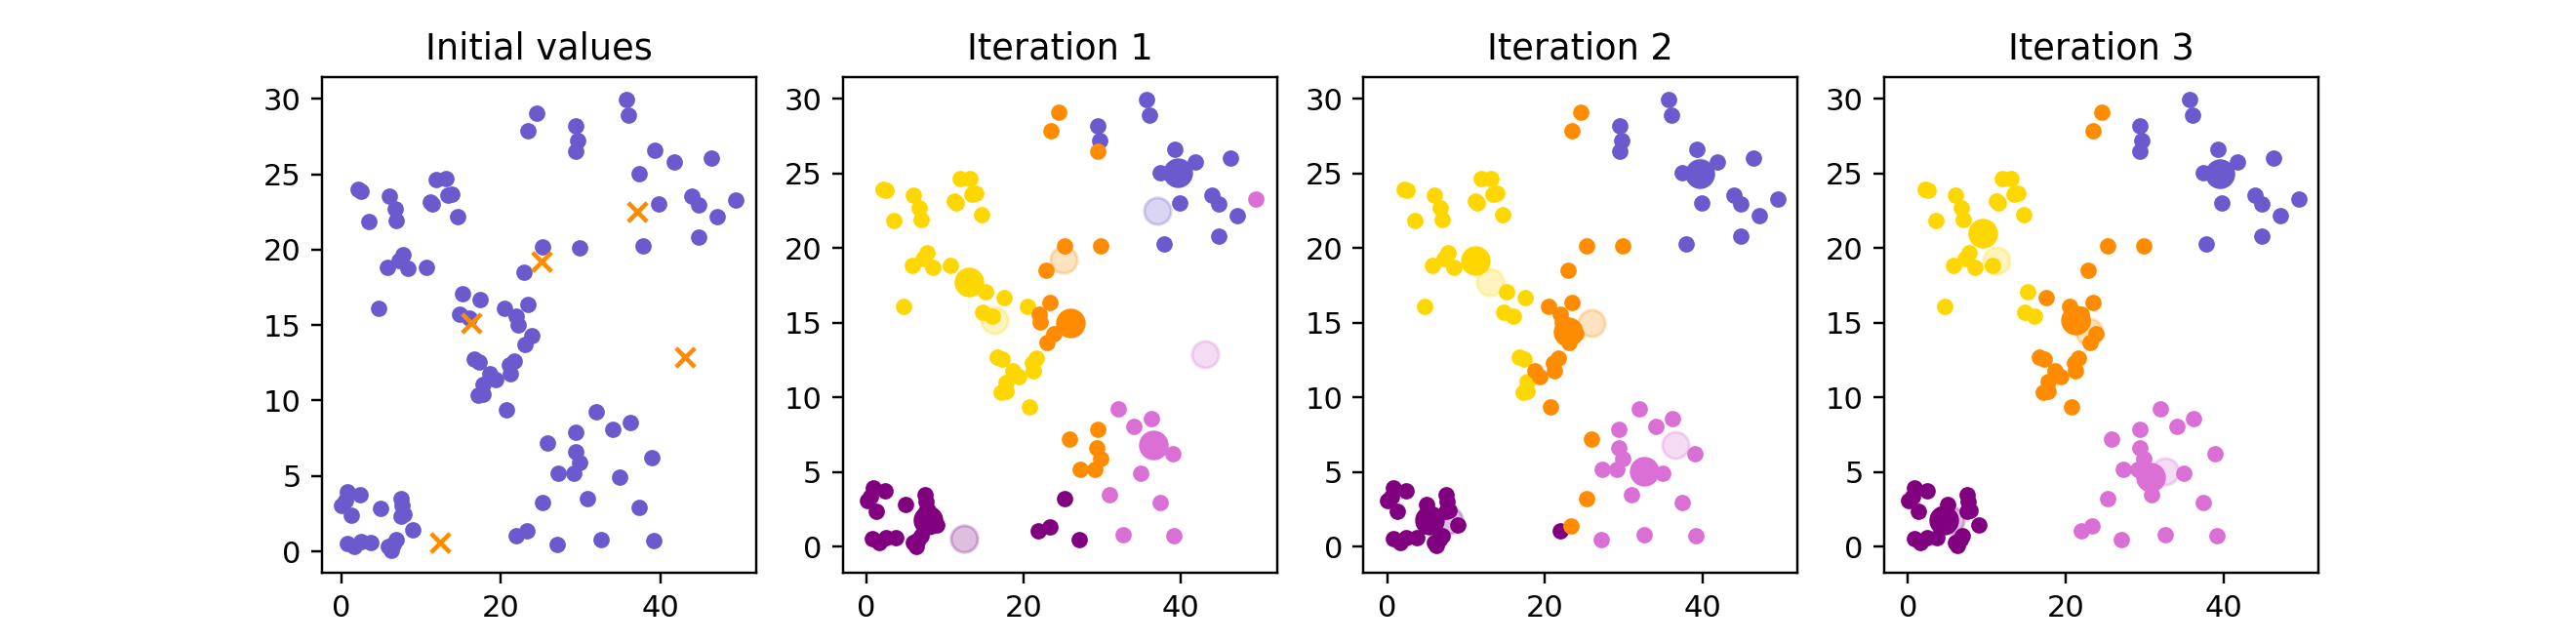

In [105]:
# Plotting function
fig,ax = plt.subplots(nrows=1,ncols=len(rep_list),figsize=(len(rep_list)*3,3))
colors = ["slateblue","orchid","gold","purple","darkorange"]

# the initial representatives and data points
ax[0].scatter(tuples[:,0], tuples[:,1], s=20, c=colors[0])
ax[0].scatter(rep_pos[:,0],rep_pos[:,1], s=40, c=colors[-1],marker='x')
ax[0].set_title('Initial values')

# the individual iterations
for idx_iter,iteration in enumerate(rep_list[1:]):
    for idx_cluster,cluster in enumerate(cluster_list[idx_iter+1]):
        ax[idx_iter+1].scatter(np.array(cluster)[:,0], np.array(cluster)[:,1], s=20, c=colors[idx_cluster])
        ax[idx_iter+1].scatter(iteration[idx_cluster,0],iteration[idx_cluster,1], s=80, c=colors[idx_cluster])
        ax[idx_iter+1].scatter(rep_list[idx_iter][idx_cluster,0],rep_list[idx_iter][idx_cluster,1], s=80, c=colors[idx_cluster], alpha=0.25)
        ax[idx_iter+1].set_title('Iteration '+str(idx_iter+1))

### Compare with the Sklearn Implementation of k-Means

<IPython.core.display.Javascript object>


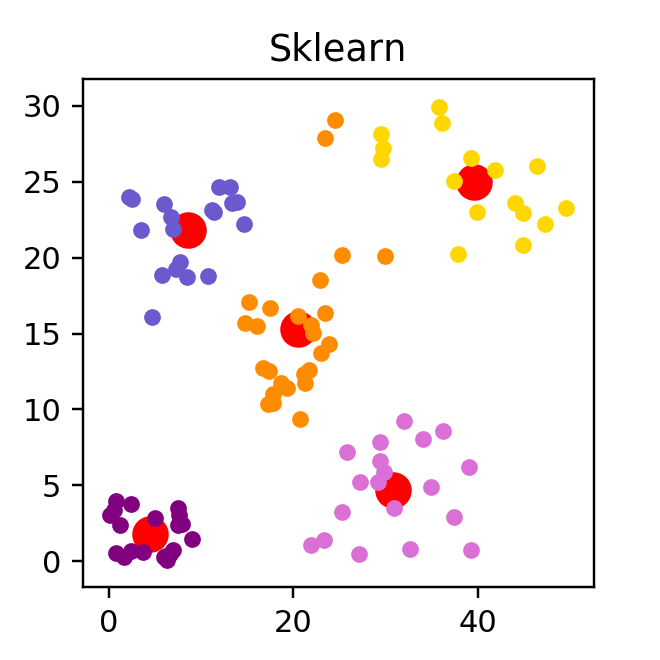

In [106]:
# Execute this cell after running the iterative implementation to compare the outcomes

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
#print (labels)

plt.figure(figsize=(3,3))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=80, linewidths=3, color='r')
for idx,dat in enumerate(data):
    plt.scatter(dat[0], dat[1], s=20, c=colors[labels[idx]])
plt.title('Sklearn')
plt.show()

# 2. Image Colours

Load a picture and use the k-means algorithm to find a number of k representatives for the colours. I then assign the data points of the clusters the color of the respective representative and check if the resulting picture still resembles the original one. 

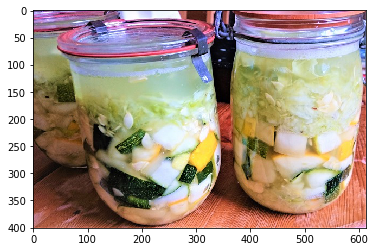

(401L, 614L, 3L)


In [7]:
# Load and plot a picture
pic = img.imread("photo.jpg")
plt.figure()
plt.imshow(pic)
plt.show()
pic_shape=pic.shape
print (pic_shape)

In [3]:
# For easier processing of the color arrays, consisting of three integer values, they are extracted as list
pic_list = pic.reshape((pic.size/3,3))
# An example of the color arrays
print (pic_list[0:5])

[[147 119 177]
 [137 110 163]
 [138 110 159]
 [136 109 154]
 [144 116 156]]


In [14]:
# Use the k-Means algorithm to find the 20 colors that we are going to use to represent the original colors from the picture
# the value of n_clusters may be changed
n_clusters=20
pic_cl = KMeans(n_clusters)
pic_cl.fit(pic_list[:,])

labels = pic_cl.labels_
centroids = pic_cl.cluster_centers_

In [15]:
# Create a new array to store the colors of the clustered picture and fill it with the values of the found representatives
pic_list_update = np.ones((len(pic_list),3))
for idx,element in enumerate(pic_list):
    pic_list_update[idx]=[int(centroids[labels[idx]][0]),int(centroids[labels[idx]][1]),int(centroids[labels[idx]][2])]

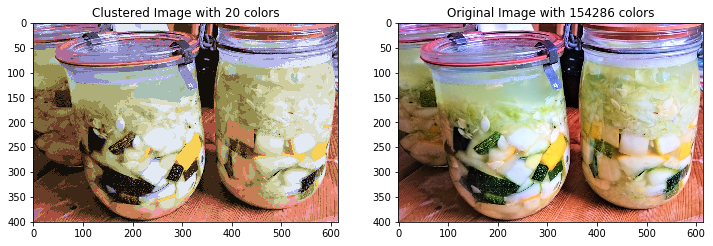

In [16]:
# Plot the clustered picture next to the original

pic_list_upd_matrix = pic_list_update.reshape((pic_shape[0],pic_shape[1],3))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
ax1.imshow(pic_list_upd_matrix.astype(int))
ax1.set_title('Clustered Image with '+str(n_clusters)+' colors')
ax2.imshow(pic)
ax2.set_title('Original Image with '+str(len(np.unique(pic_list,axis=0)))+' colors')
plt.show()

Even though the clustered image uses only a tiny fraction of the colors of the original image, the picture is clearly discernible and resembling the original one.